# Projektabgabe
### Gruppe L: Energieeffizienz in Staubsaugern

**Nils Keller, Max Pazda, Simon Kammerer, Lennart Morlok**

In [196]:
#Module importieren
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import datetime as dt
import seaborn as sns
from distutils.spawn import find_executable
from cycler import cycler
from collections.abc import Iterable
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import os
import matplotlib.dates as mdates
import locale
from distutils.spawn import find_executable


print('Versionen der verwendeten python-Module: ')
print('os', os)
print('locale', locale)
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('seaborn', sns.__version__)
print('find_executable',find_executable)
print('cycler',cycler)

Versionen der verwendeten python-Module: 
os <module 'os' from '/opt/conda/lib/python3.9/os.py'>
locale <module 'locale' from '/opt/conda/lib/python3.9/locale.py'>
numpy 1.22.3
matplotlib 3.5.1
pandas 1.4.2
datetime <module 'datetime' from '/opt/conda/lib/python3.9/datetime.py'>
seaborn 0.11.2
find_executable <function find_executable at 0x7f59e9bd3160>
cycler <function cycler at 0x7f59eb0c9f70>


In [197]:
#da das Modul: sklearn einen error bereitet hat habe ich es über pip install heruntergeladen
!pip install -U scikit-learn

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [198]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

In [199]:
# Zum Bild einfügen
#<img src="https://github.com/morlokle/Abgabe/blob/main/Milestone_F2.jpg?raw=true" width="700"/>

## Verbrauchsanalyse und Erzeugungsanalyse

## Verbrauchsdaten
- Quelle zu den Verbrauchsdaten: Standardlastprofil eines Einfamilienhauses der Stadtwerke Hilden in 2022 https://stadtwerke-hilden.de/netze/netzregulierung/strom/standardlastprofile.html

In [200]:
import pandas as pd
materialliste = 'https://raw.githubusercontent.com/morlokle/Abgabe/main/MaterialienStaubsauger.csv'
df = pd.read_csv(materialliste)
df.head()

,Gesamt [g],Kunststoffe [g],Aluminium [g],Kupfer [g],Stahl [g],Messing [g],Graphit [g],Sonstige [g]
0,5718,4331,100,32,253,974,7,21


In [201]:
import pandas as pd
emissionen = 'https://raw.githubusercontent.com/morlokle/Abgabe/main/CO2FussabdruckStaubsauger.csv'
df = pd.read_csv(emissionen)
df.head()

,Gesamt[kg CO2-eq],Herstellung[kg CO2-eq],End-of-life[kg CO2-eq]
0,28.79,27.2,1.59


### Quelle
- Quelle zur LCA mit Materialliste und CO2 Fussabdruck: "Technical support for Environmental Footprinting, material efficiency in product policy and the European Platform on LCA"; Silvia Bobba, Fulvio Ardente, Fabrice Mathieux; November 2015
- Die Daten dieser Quelle sind als aussagekräftig zu bewerten, da sie aus dem Institute for Environment and Sustainability in der EU Komission Joint Research Centre Institute stammen und somit als zuverlässig einzuschätzen sind. Des weiteren ergeben die berechneten CO2 Emissionen verglichen mit anderen Haushaltgeräten Sinn.

Slide Type
Verbrauchsdaten

    Quelle zu den Verbrauchsdaten: Standardlastprofil eines Einfamilienhauses der Stadtwerke Hilden in 2022 https://stadtwerke-hilden.de/netze/netzregulierung/strom/standardlastprofile.html



In [202]:
verbrauch1 = 'https://raw.githubusercontent.com/morlokle/Abgabe/main/Lastprofil_Haushalt.csv'
verbrauch1 = pd.read_csv(verbrauch1,delimiter = ';', decimal=',')

In [203]:
# da Datum als object erkannt wird konvertierung zu datetime
verbrauch1['Datum'] = verbrauch1['Datum'].apply(#
    lambda x: #
    dt.datetime.strptime(x, "%d.%m.%Y %H:%M"))

In [204]:
#Hier werden die ersten 5 Zeilen der Verbrauchsdaten in einer Tabelle angezeigt
verbrauch1.head() 

,Datum,Leistung [Watt]
0,2022-01-01 00:15:00,104.636
1,2022-01-01 00:30:00,96.775
2,2022-01-01 00:45:00,88.483
3,2022-01-01 01:00:00,82.117
4,2022-01-01 01:15:00,76.464


**Kommentar zu den Verbrauchsdaten:** 
- Die Verbrauchsdaten stellen ein Standartlastprofil (SLP) der Stadtwerke Hilden dar, welche den Stromlastgang eines Einfamilienhauses über das Jahr 2022 simuliert ausgeben. Das SLP hat einen Jahresverbrauch von 1.000.000 kWh im Jahr. Die ersten angezeigten 5 Daten erscheinen uns plausibel und sind erwartungsgemäß, wenn davon ausgegangen wird, dass die Familien die in Einfamilienhäuser in Hilden bewohnen, vermehrt Silvester in dieses Jahr zuhause feiern und somit der Stromverbrauch zu dieser Zeit um 0 Uhr etwas höher ist. 

In [205]:
#Aufbereitung der Standartlast auf ein Einfamilienhaus mit 3-Personen
verbrauch1['Leistung [Watt]'] =verbrauch1['Leistung [Watt]']*1000000**-1*3500

In [206]:
# Da wir viertelstündliche Werte haben wird die Summe durch 4 geteilt um zu prüfen ob Aufbereitung geklappt hat
verbrauch1['Leistung [Watt]'].sum()/4

3500.0000927499996

**Kommentar zur Aufbereitung der Verbrauchsdaten:** 
- Da das SLP einen simulierten Jahresverbrauch von 1.000.000 kWh im Jahr hat werden die Daten für unser Beispiel aufbereitet. Wir gehen in unserem Beispiel von einem 3-Personen-Haushalt aus, welcher einen Stromverbrauch von 3500 kWh im Jahr hat. Auf diesen Verbrauch werden die Werte angeglichen auf diesen Verbrauch.

In [207]:
#Hier werden die maximalen Werte der Verbrauchsdaten angezeigt
verbrauch1.max()

Datum              2023-01-01 00:00:00
Leistung [Watt]               0.797825
dtype: object

**Kommentar Daten des maximalen Werts der Verbrauchsdaten:**
- Bei dieser Anzeige muss beachtet werden das für beide Zeilen der maximale Wert angezeigt wird und diese nicht direkt zusammenhängen. In Fall des Datum wurde der höchste Wert, also angefangen mit dem Jahr 2023 der Wert "2023-01-01" verwedet da er beginnend mit dem Jahr zahlenmäßig der höchste ist. Im Fall des Verbrauches wurde mit 227.95 Watt mit hoher Sicherheit ein Tag aus dem Winer verwendet, an dem der Verbrauch besonders hoch war. (Mehr Strombedarf im Winter z.B. Mehr Licht, Wärmebedarf höher, Personen öfter im Haus wegen Kälte/Sonnenuntergang)

## Erzeugungsdaten
- Quelle zu den Erzeugungsdaten: Michael Brod, Gemessene Daten einer PV-Hausanlage 2011: Messdaten in 15-Minuten-Auflösung. (Die Anlage hat 4,51 kWp, Dachneigung 30 °, Abweichung von Süden 40° nach Westen, Standort 61476 Kronberg im Taunus) https://www.100pro-erneuerbare.com/messdaten/messdaten.htm

In [208]:
erzeugung1 = 'https://raw.githubusercontent.com/morlokle/Abgabe/main/Erzeugungsdaten%20-%20Kopie.csv'
erzeugung1 = pd.read_csv(erzeugung1,delimiter = ';', decimal=',')

In [209]:
# da Datum als object erkannt wird konvertierung zu datetime
erzeugung1['Datum'] = erzeugung1.Datum.apply(#
    lambda x: #
    dt.datetime.strptime(x, "%d.%m.%Y %H:%M"))

In [210]:
#Hier werden die ersten 5 Zeilen der Erzeugungsdaten in einer Tabelle angezeigt
erzeugung1.head()

,Datum,PV[Watt]
0,2011-01-01 00:00:00,0
1,2011-01-01 00:15:00,0
2,2011-01-01 00:30:00,0
3,2011-01-01 00:45:00,0
4,2011-01-01 01:00:00,0


**Kommentar zu dem Erzeugungsdaten:**
- Die angezeigten 5 Zeilen des Datensatzes zeigen die Erzeugung einer PV-Anlage über ein Jahr in 15 minütiger Auflösung beginnend mit den 01.01.2011 (über das Jahr 2011). Da in der Nacht keine Sonne scheint sind die Werte plausibel und erwartungsgemäß. (Bis auf Feuerwerksraketen sollte keine Einstrahlung auf die Dächer treffen ;) )

In [211]:
#Hier werden die maximalen Werte der Erzeugungsdaten angezeigt
erzeugung1.max()

Datum       2011-12-31 23:45:00
PV[Watt]                   4000
dtype: object

**Kommentar Daten des maximalen Werts der Erzeugungsdaten:** 
- Auch bei dieser Anzeige muss beachtet werden das für beide Zeilen der maximale Wert angezeigt wird und diese nicht direkt zusammenhängen. In Fall des Datum wurde der höchste Wert, also der 31.12.2022 um 23:45 Uhr verwedet da er zahlenmäßig der höchste ist. Im Fall der PV Leistung wurde mit 4000 Watt mit hoher Sicherheit ein Tag aus dem Sommer verwendet, welcher von der Auslegung des Wechselrichters auf 4 kW beschränkt ist und deswegen der höchste Wert bei Vollast auch bei 4000 Watt liegt.

### Darstellung des Jahresverlaufs des Verbrauchs und der Erzeugung über der Zeit

<Figure size 720x432 with 0 Axes>

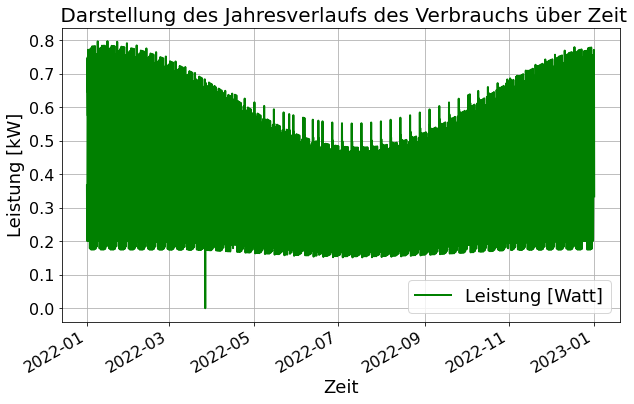

<Figure size 720x432 with 0 Axes>

In [212]:
# Darstellung des Jahresverlaufs des Verbrauchs über der Zeit
verbrauch1.plot(x = 'Datum', y = 'Leistung [Watt]', c="green")
plt.title(' Darstellung des Jahresverlaufs des Verbrauchs über Zeit')
plt.xlabel('Zeit')
plt.ylabel('Leistung [kW]')
plt.grid()
plt.figure()

<Figure size 720x432 with 0 Axes>

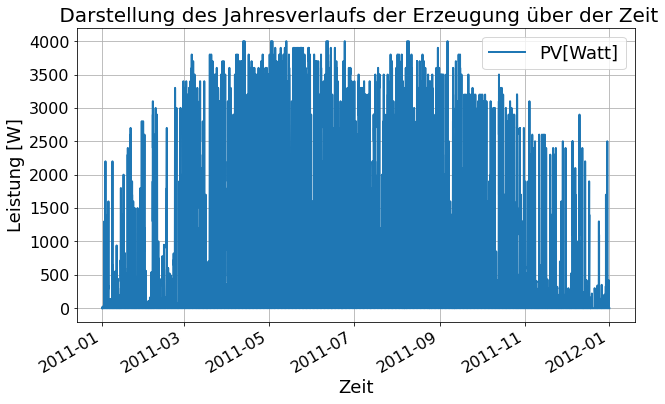

<Figure size 720x432 with 0 Axes>

In [213]:
# Darstellung des Jahresverlaufs der Erzeugung über der Zeit
erzeugung1.plot(x = 'Datum', y = 'PV[Watt]')
plt.title(' Darstellung des Jahresverlaufs der Erzeugung über der Zeit')
plt.xlabel('Zeit')
plt.ylabel('Leistung [W]')
plt.grid()
plt.figure()

### Darstellung der Dauerlinien

In [214]:
#res = erzeugung1['Datum'][1]-erzeugung1['Datum'][0]
#print('Auflösung '+str(res))

In [215]:
#dW = 1000*60*60 # kWh in J
#dt = 15*60 # 15 min. in sec
dW_dt_faktor = dW/dt
#print('Umrechnungsfaktor zu W ist ' + str(dW_dt_faktor))

NameError: name 'dW' is not defined

In [216]:
erzeugung1['industrialP'] = dW_dt_faktor*0.001*erzeugung1['PV[Watt]']

NameError: name 'dW_dt_faktor' is not defined

In [217]:
#erzeugung1.head()

In [218]:
#df2 = erzeugung1.dropna(subset=['zeit','industrialP'])

### Verbrauch

In [219]:
sorted_1 = sorted(verbrauch1['Leistung [Watt]'], reverse = True)

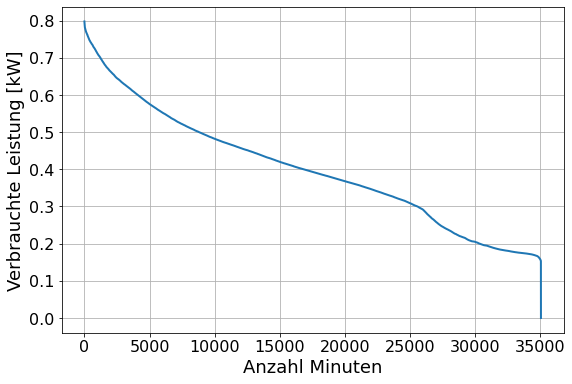

In [220]:
plt.figure(figsize=(9,6))
plt.plot(verbrauch1.index-verbrauch1.index[0],sorted_1)
plt.ylabel('Verbrauchte Leistung [kW]')
plt.xlabel('Anzahl Minuten')
plt.grid()
plt.show()

### Erzeugung

In [221]:
sorted_2 = sorted(erzeugung1['PV[Watt]'], reverse = True)

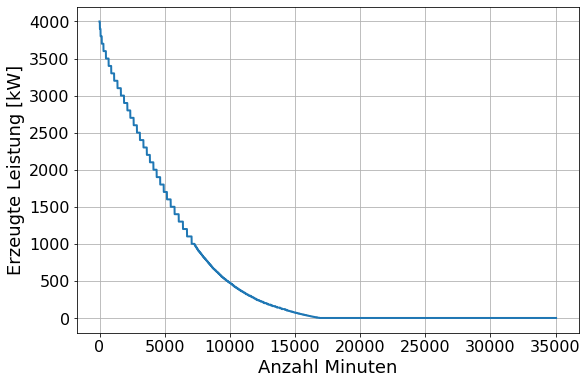

In [222]:
plt.figure(figsize=(9,6))
plt.plot(erzeugung1.index-erzeugung1.index[0],sorted_2)
plt.ylabel('Erzeugte Leistung [kW]')
plt.xlabel('Anzahl Minuten')
plt.grid()
plt.show()

### Darstellung des Taganteils gegenüber dem Nachtanteil (Erzeugung)

In [223]:
#erzeugung1 = 'https://raw.githubusercontent.com/morlokle/Abgabe/main/Erzeugungsdaten%20-%20Kopie.csv'
#erzeugung1 = pd.read_csv(erzeugung1,delimiter = ';', decimal=',')
#zur sicherheit nochmal laden

In [224]:
# da Datum als object erkannt wird konvertierung zu datetime
#erzeugung1['Datum'] = erzeugung1.Datum.apply(#
 #   lambda x: #
  #  dt.datetime.strptime(x, "%d.%m.%Y %H:%M"))
#zur sicherheit nochmal laden

In [225]:
#erzeugung1['Jahr'] = erzeugung1['Datum'].dt.year
#erzeugung1['Monat'] = erzeugung1['Datum'].dt.month
#erzeugung1['Wochentag'] = erzeugung1['Datum'].dt.weekday

In [226]:
erzeugung1.set_index('Datum', inplace = True)

In [227]:
erzeugung1.head()

,PV[Watt]
Datum,
2011-01-01 00:00:00,0
2011-01-01 00:15:00,0
2011-01-01 00:30:00,0
2011-01-01 00:45:00,0
2011-01-01 01:00:00,0


Vergleich Tag-nacht vom längsten Tag und kürzesten:

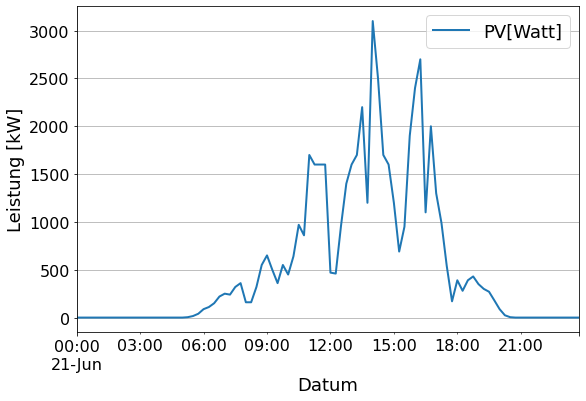

In [228]:
ax = erzeugung1.loc['2011-06-21 00:00:00':'2011-06-21 23:45:00'].plot(y = 'PV[Watt]' ,linestyle='-', figsize=(9,6))
plt.ylabel('Leistung [kW]')
plt.grid()
plt.show()

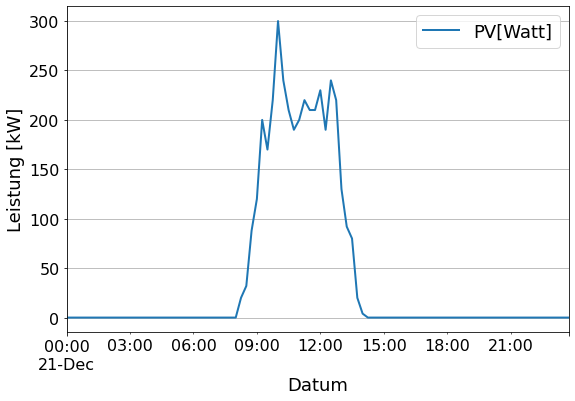

In [229]:
ax = erzeugung1.loc['2011-12-21 00:00:00':'2011-12-21 23:45:00'].plot(y = 'PV[Watt]' ,linestyle='-', figsize=(9,6))
plt.ylabel('Leistung [kW]')
plt.grid()
plt.show()

### Darstellung des Sommeranteils gegenüber dem Winteranteil

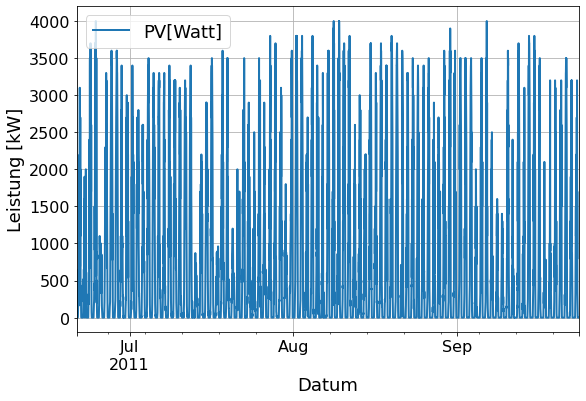

In [230]:
ax = erzeugung1.loc['2011-06-21':'2011-09-23'].plot(y = 'PV[Watt]' ,linestyle='-', figsize=(9,6))
plt.ylabel('Leistung [kW]')
plt.grid()
plt.show()

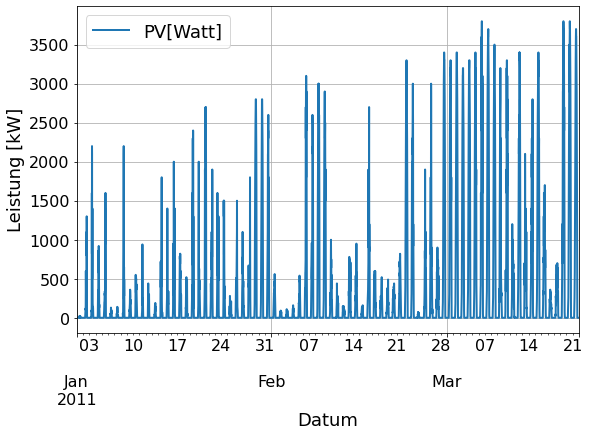

In [231]:
ax = erzeugung1.loc['2011-01-01':'2011-03-21'].plot(y = 'PV[Watt]' ,linestyle='-', figsize=(9,6))
plt.ylabel('Leistung [kW]')
plt.grid()
plt.show()

In [232]:
# Sommer: In 2011 Kalendarisch von Dienstag, 21. Juni bis Freitag, 23. September
# Winter: Annahme In 2011 Kalendarisch von Samstag 01. Januar bis 21. März 2011 (theoretisch + 22.12.10-31.12.10)

### Verbrauch

In [233]:
#verbrauch1 = 'https://raw.githubusercontent.com/morlokle/Abgabe/main/Lastprofil_Haushalt.csv'
#verbrauch1 = pd.read_csv(verbrauch1,delimiter = ';', decimal=',')

In [234]:
# da Datum als object erkannt wird konvertierung zu datetime
#verbrauch1['Datum'] = verbrauch1['Datum'].apply(#
 #   lambda x: #
  #  dt.datetime.strptime(x, "%d.%m.%Y %H:%M"))

In [235]:
verbrauch1.set_index('Datum', inplace = True)

In [236]:
verbrauch1.head()

,Leistung [Watt]
Datum,
2022-01-01 00:15:00,0.366226
2022-01-01 00:30:00,0.338713
2022-01-01 00:45:00,0.309690
2022-01-01 01:00:00,0.287409
2022-01-01 01:15:00,0.267624


In [237]:
#verbrauch1['Jahr'] = verbrauch1['Datum'].dt.year
#verbrauch1['Monat'] = verbrauch1['Datum'].dt.month
#verbrauch1['Wochentag'] = verbrauch1['Datum'].dt.weekday

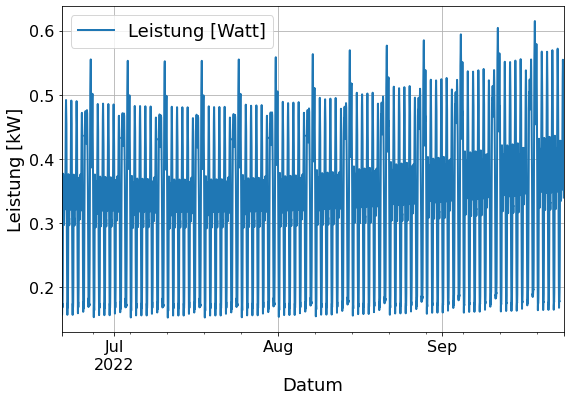

In [238]:
ax = verbrauch1.loc['2022-06-21':'2022-09-23'].plot(y = 'Leistung [Watt]' ,linestyle='-', figsize=(9,6))
plt.ylabel('Leistung [kW]')
plt.grid()
plt.show()

/tmp/ipykernel_238/333367503.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = verbrauch1.loc['2022-01-01':'2022-03-21'].plot(y = 'Leistung [Watt]' ,linestyle='-', figsize=(9,6))


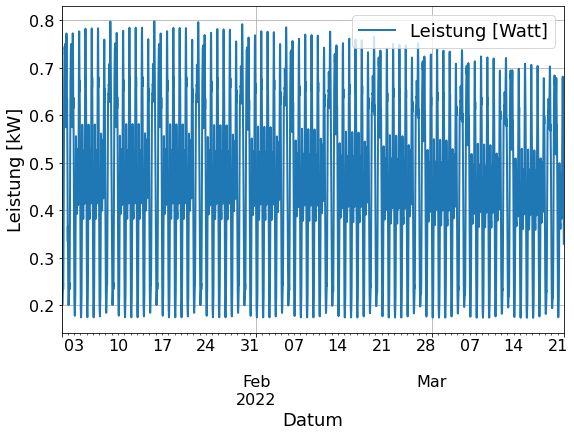

In [239]:
ax = verbrauch1.loc['2022-01-01':'2022-03-21'].plot(y = 'Leistung [Watt]' ,linestyle='-', figsize=(9,6))
plt.ylabel('Leistung [kW]')
plt.grid()
plt.show()

### Übersicht über monatsspezifische Schwankungsbreiten (Boxplot)

In [240]:
verbrauch1 = 'https://raw.githubusercontent.com/morlokle/Abgabe/main/Lastprofil_Haushalt.csv'
verbrauch1 = pd.read_csv(verbrauch1,delimiter = ';', decimal=',')

In [241]:
# da Datum als object erkannt wird konvertierung zu datetime
verbrauch1['Datum'] = verbrauch1['Datum'].apply(#
    lambda x: #
    dt.datetime.strptime(x, "%d.%m.%Y %H:%M"))

In [242]:
verbrauch1.head()

,Datum,Leistung [Watt]
0,2022-01-01 00:15:00,104.636
1,2022-01-01 00:30:00,96.775
2,2022-01-01 00:45:00,88.483
3,2022-01-01 01:00:00,82.117
4,2022-01-01 01:15:00,76.464


In [243]:
verbrauch1['Jahr'] = verbrauch1['Datum'].dt.year
verbrauch1['Monat'] = verbrauch1['Datum'].dt.month
verbrauch1['Wochentag'] = verbrauch1['Datum'].dt.weekday

In [244]:
erzeugung1 = 'https://raw.githubusercontent.com/morlokle/Abgabe/main/Erzeugungsdaten%20-%20Kopie.csv'
erzeugung1 = pd.read_csv(erzeugung1,delimiter = ';', decimal=',')
#zur sicherheit nochmal laden

In [245]:
# da Datum als object erkannt wird konvertierung zu datetime
erzeugung1['Datum'] = erzeugung1.Datum.apply(#
    lambda x: #
    dt.datetime.strptime(x, "%d.%m.%Y %H:%M"))
#zur sicherheit nochmal laden

In [246]:
erzeugung1['Jahr'] = erzeugung1['Datum'].dt.year
erzeugung1['Monat'] = erzeugung1['Datum'].dt.month
erzeugung1['Wochentag'] = erzeugung1['Datum'].dt.weekday

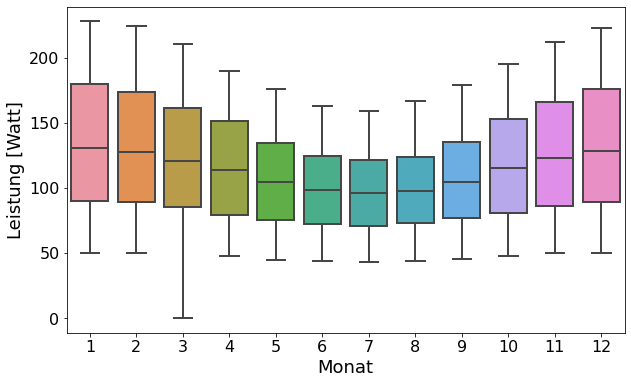

In [247]:
sns.boxplot( y=verbrauch1["Leistung [Watt]"], x=verbrauch1["Monat"] );
plt.show()

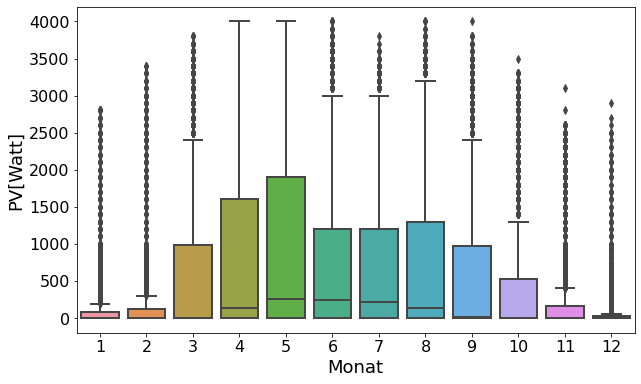

In [248]:
sns.boxplot( y=erzeugung1["PV[Watt]"], x=erzeugung1["Monat"] );
plt.show()

In [249]:
#Das hier wäre der Ansatz für Subplot
#fig, axes = plt.subplots(2, 1, figsize=(9, 6), sharex=True)

#for name, ax in zip(['industrialP', 'pvP'], axes):
 #   ax.grid()
  #  sns.boxplot(data=df2, x='Monat', y=name, ax=ax)
#if ax != axes[-1]:
 #   ax.set_xlabel('')

ICH WEiß grad nicht wohin, deswegen füge ich es einfach mal hier ein Steckbrief(?)+Energiesparmaßnahmen+Anforderungsliste:

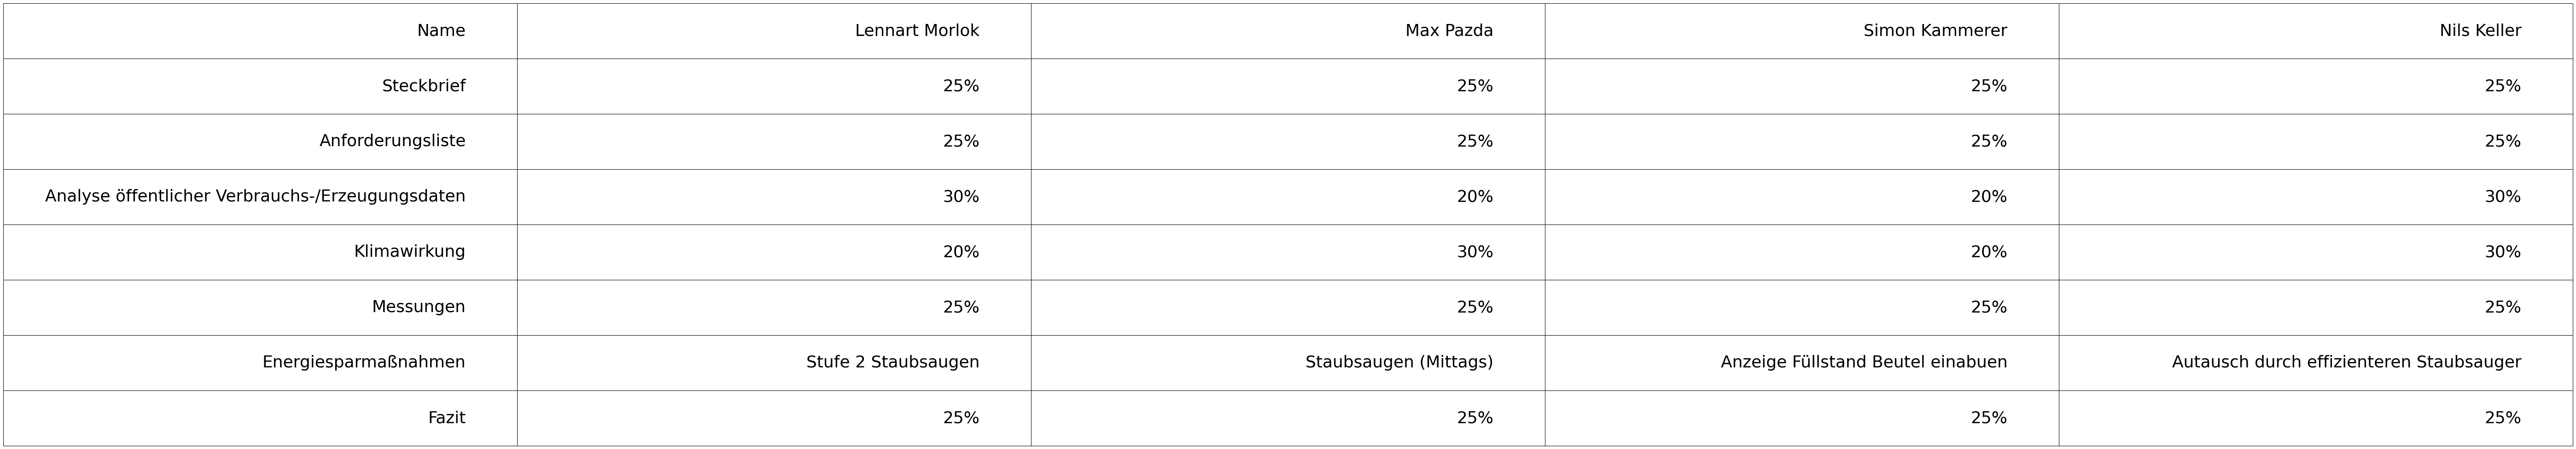

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Diagramm und Achsen definieren
fig, ax = plt.subplots()

# Werte für Tabelle erstellen
table_data=[
    ["Name", "Lennart Morlok", "Max Pazda", "Simon Kammerer", "Nils Keller"],
    ["Steckbrief", "25%", "25%","25%","25%"],
    ["Anforderungsliste", "25%", "25%","25%","25%"],
    ["Analyse öffentlicher Verbrauchs-/Erzeugungsdaten", "30%", "20%","20%","30%"],
    ["Klimawirkung", "20%", "30%","20%","30%"],
    ["Messungen", "25%", "25%","25%","25%"],
    ["Energiesparmaßnahmen", "Stufe 2 Staubsaugen", "Staubsaugen (Mittags)","Anzeige Füllstand Beutel einabuen","Autausch durch effizienteren Staubsauger"],
    ["Fazit", "25%", "25%","25%","25%"]
]

#Tabelle erstellen
table = ax.table(cellText=table_data, loc='center')

# Tabelle ändern
table.set_fontsize(100)
table.scale(10,10)
ax.axis('off')

#Tabelle anzeigen
plt.show()


Namen müssen noch geändert werden+evtl letzter punkt 5

In [277]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

In [278]:
# Anzahl Termine eintragen
no_seminars = 5 

In [279]:
# Orte eintragen
seminar_loc = ['1', #1
               '2', #2
               '3', #3
               '4', #4
               '5']
lab_loc = 'HW2-47'

In [280]:
# Arbeitsform
seminar_type = ['Stufe 2 Staubsaugen', #1
                'Mittags (12 Uhr) Staubsaugen (Bei Sonne)', #2
                'Anzeige Füllstand Beutel', #3
                'Autausch durch neueren Staubsauger', #4
                '(Besen benutzen)?']
lab_type = 'PRAK'

In [281]:
# Lernziele
seminar_obj = ['2. Energiebedarf verringern',
              'keine konkrete Kategorie: am ehesten: 1. Energienutzung vermeiden (Energienutzung verschieben zu selbst produziertem grünem Strom) oder 3. Wandlerverluste reduzieren',
               '5. Wirkungsgrade steigern(?) oder Energiebedarf verringern',
              'Energiebedarf verringern (weniger Leistung+effizienter)',            
              '1. Energienutzung vermeiden']
lab_obj = ['Wird konsequent auf Stufe 2 von 3 gestaubsaugt, kann dort Leistung eingspart werden. Nach Vergleichstests von Stufe 2 und 3 reinigt die Stufe 2 bei normaler Verschmutzung ebenso ausreichend, nach unserem Empfinden. (Dazu wurde Dreck von der Straße zweimal verteilt und durch beide Stufen gestaubsaugt. Das Ergebnis ist bei beiden sehr gut ausgefallen, kein Unterschied viel auf.', #1
           'Hier soll vor allem der selbst produzierte grüne Strom von der Solaranlage genutzt werden.  Dies soll den Strommix und die damit verbundenen Emissionen ersetzen. So fallen zudem geringere Umwandlungsverluste und Transportverluste vom Stromnetz an. Der Verbrauch des Staubsaugers bleibt allerdings gleich.', #2
           'Hier soll eine Füllstandsanzeige des Staubsaugerbeutels angebracht werden. Da der Staubsauger mehr Leistung braucht um die gleiche Saugleistung bereit zu stellen/bei gleicher Leistung weniger Saugleistung erzeugt. Der Effekt soll sein, dass die Saugqualität nicht abnimmt bei gleichbleibender Leistung.', #3
           'Der Staubsauger soll durch einen neueren Staubsauger, welcher weniger Leistung, aber eine ähnliche Saugleistung besitzt, ersetzt werden. Der neue Staubsauger besitzt eine Nennleistung von 400W, was den Leistungsbedarf senken würde', #4
           'Hier könnte der Strombedarf auf Null gesenkt werden. Die Sauberkeit sollte überprüft werden.']

In [282]:
# Dataframes generieren
seminartermine = pd.DataFrame()
labtermine = pd.DataFrame()

In [283]:
# Orte, Ziele, etc. eintragen
seminartermine['Nr.'] = seminar_loc

seminartermine['Energiesparmaßnahme'] = seminar_type

seminartermine['Art nach Hesselbach 2012'] = seminar_obj

seminartermine['(Möglicher) Effekt'] = lab_obj


In [284]:
# Termine aneinander reihen
#a1 = pd.date_range(start=seminarstart1, periods=int((no_seminars+1)), freq='7D')
#a2 = pd.date_range(start=seminarstart2, periods=int((no_seminars+1)), freq='7D')
#a3 = pd.date_range(start=seminar_extra, periods=2, freq = '105min')
#a12 = sorted(a1.append(a2).append(a3))
#l1 = pd.date_range(start=lab1start, periods = int((no_labs+1)), freq='7D')
#l2 = pd.date_range(start=lab2start, periods = int((no_labs+1)), freq='7D')
#l12 = sorted(l1.append(l2))
#alldays = sorted(a12 + l12)

In [285]:
# zusammenfügen
#termine = pd.concat([seminartermine, labtermine], ignore_index=True)

In [286]:
termine.style.hide(axis='index')

Nr.,Energiesparmaßnahme,Art nach Hesselbach 2012,(Möglicher) Effekt
1,Stufe 2 Staubsaugen,2. Energiebedarf verringern,"Wird konsequent auf Stufe 2 von 3 gestaubsaugt, kann dort Leistung eingspart werden. Nach Vergleichstests von Stufe 2 und 3 reinigt die Stufe 2 bei normaler Verschmutzung ebenso ausreichend, nach unserem Empfinden. (Dazu wurde Dreck von der Straße zweimal verteilt und durch beide Stufen gestaubsaugt. Das Ergebnis ist bei beiden sehr gut ausgefallen, kein Unterschied viel auf."
2,Mittags (12 Uhr) Staubsaugen (Bei Sonne),keine konkrete Kategorie: am ehesten: 1. Energienutzung vermeiden (Energienutzung verschieben zu selbst produziertem grünem Strom) oder 3. Wandlerverluste reduzieren,Hier soll vor allem der selbst produzierte grüne Strom von der Solaranlage genutzt werden. Dies soll den Strommix und die damit verbundenen Emissionen ersetzen. So fallen zudem geringere Umwandlungsverluste und Transportverluste vom Stromnetz an. Der Verbrauch des Staubsaugers bleibt allerdings gleich.
3,Anzeige Füllstand Beutel,5. Wirkungsgrade steigern(?) oder Energiebedarf verringern,"Hier soll eine Füllstandsanzeige des Staubsaugerbeutels angebracht werden. Da der Staubsauger mehr Leistung braucht um die gleiche Saugleistung bereit zu stellen/bei gleicher Leistung weniger Saugleistung erzeugt. Der Effekt soll sein, dass die Saugqualität nicht abnimmt bei gleichbleibender Leistung."
4,Autausch durch neueren Staubsauger,Energiebedarf verringern (weniger Leistung+effizienter),"Der Staubsauger soll durch einen neueren Staubsauger, welcher weniger Leistung, aber eine ähnliche Saugleistung besitzt, ersetzt werden. Der neue Staubsauger besitzt eine Nennleistung von 400W, was den Leistungsbedarf senken würde"
5,(Besen benutzen)?,1. Energienutzung vermeiden,Hier könnte der Strombedarf auf Null gesenkt werden. Die Sauberkeit sollte überprüft werden.


# Zum Bild einfügen
<img src="https://github.com/morlokle/Abgabe/blob/main/anforderungsliste.png?raw=true" width="700"/>

### Heatmap

In [78]:
#Die folgende Funktion ermöglicht es, die Achsenskalierung besser anzupassen.
class AxTransformer:
    def __init__(self, datetime_vals=False):
        self.datetime_vals = datetime_vals
        self.lr = linear_model.LinearRegression()
        
        return
    
    def process_tick_vals(self, tick_vals):
        if not isinstance(tick_vals, Iterable) or isinstance(tick_vals, str):
            tick_vals = [tick_vals]
            
        if self.datetime_vals == True:
            tick_vals = pd.to_datetime(tick_vals).astype(int).values
            
        tick_vals = np.array(tick_vals)
            
        return tick_vals
    
    def fit(self, ax, axis='x'):
        axis = getattr(ax, f'get_{axis}axis')()
        
        tick_locs = axis.get_ticklocs()
        tick_vals = self.process_tick_vals([label._text for label in axis.get_ticklabels()])
        
        self.lr.fit(tick_vals.reshape(-1, 1), tick_locs)
        
        return
    
    def transform(self, tick_vals):        
        tick_vals = self.process_tick_vals(tick_vals)
        tick_locs = self.lr.predict(np.array(tick_vals).reshape(-1, 1))
        
        return tick_locs
    
def set_date_ticks(ax, start_date, end_date, axis='y', date_format='%Y-%m-%d', **date_range_kwargs):
    dt_rng = pd.date_range(start_date, end_date, **date_range_kwargs)

    ax_transformer = AxTransformer(datetime_vals=True)
    ax_transformer.fit(ax, axis=axis)
    
    getattr(ax, f'set_{axis}ticks')(ax_transformer.transform(dt_rng))
    getattr(ax, f'set_{axis}ticklabels')(dt_rng.strftime(date_format))

    ax.tick_params(axis=axis, which='both', bottom=True, top=False, labelbottom=True)
    
    return ax

In [79]:
x = 'Datum', y = 'Leistung [Watt]'
x = 'Datum', y = 'PV[Watt]'

SyntaxError: cannot assign to literal (2160553762.py, line 1)

In [80]:
import matplotlib.dates as mdates

In [81]:
hm_df = pd.DataFrame({'Leistung [Watt]': verbrauch1['Leistung [Watt]']})
hm_df['date'] = verbrauch1.index.date
hm_df['time'] = verbrauch1.index.time
hm_piv = hm_df.pivot(index = 'time', columns = 'date', values = 'Leistung [Watt]')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(hm_piv, cbar_kws={'label': 'Leistung [kW]'})
ax.set_title('Leistung [kW] des Stromnetzimports\n eines Industriebetriebs')
set_date_ticks(ax, hm_piv.columns[0], hm_piv.columns[-1] ,axis='x', freq='1M', date_format='%B %Y')
ax.tick_params(axis="x", rotation=45)

ValueError: Index contains duplicate entries, cannot reshape

In [82]:
hm_df = pd.DataFrame({'PV[Watt]': df2['PV[Watt]']})
hm_df['date'] = df2.index.date
hm_df['time'] = df2.index.time
hm_piv = hm_df.pivot(index = 'time', columns = 'date', values = 'industrialP')
fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(hm_piv, cbar_kws={'label': 'Leistung [kW]'})
ax.set_title('Leistung [kW] einer PV-Anlage \n auf einem Einfamilienhaus in 2011')
set_date_ticks(ax, hm_piv.columns[0], hm_piv.columns[-1] ,axis='x', freq='1M', date_format='%B %Y')
ax.tick_params(axis="x", rotation=30)

NameError: name 'df2' is not defined

In [83]:
#da sklearn einen error bereitet hat habe ich es über pip install heruntergeladen
import sklearn
!pip install scikit-learn

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [84]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import datetime as dt
import seaborn as sns
from distutils.spawn import find_executable
from cycler import cycler
from collections.abc import Iterable
# from sklearn import linear_model
#from jupytercards import display_flashcards
#from pygit2 import Repository
#from jupyterquiz import display_quiz

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('seaborn', sns.__version__)
print('find_executable',find_executable)
print('cycler',cycler)

Versionen der verwendeten python-Module: 
numpy 1.22.3
matplotlib 3.5.1
pandas 1.4.2
datetime <module 'datetime' from '/opt/conda/lib/python3.9/datetime.py'>
seaborn 0.11.2
find_executable <function find_executable at 0x7f59e9bd3160>
cycler <function cycler at 0x7f59eb0c9f70>


# Klimawirkung und Ressourceneffizienz 

In [85]:
import pandas as pd
materialliste = 'https://raw.githubusercontent.com/morlokle/Abgabe/main/MaterialienStaubsauger.csv'
df = pd.read_csv(materialliste)
df.head()

,Gesamt [g],Kunststoffe [g],Aluminium [g],Kupfer [g],Stahl [g],Messing [g],Graphit [g],Sonstige [g]
0,5718,4331,100,32,253,974,7,21


In [86]:
import pandas as pd
emissionen = 'https://raw.githubusercontent.com/morlokle/Abgabe/main/CO2FussabdruckStaubsauger.csv'
df = pd.read_csv(emissionen)
df.head()

,Gesamt[kg CO2-eq],Herstellung[kg CO2-eq],End-of-life[kg CO2-eq]
0,28.79,27.2,1.59


### Quelle der Daten
- Quelle zur LCA mit Materialliste und CO2 Fussabdruck: "Technical support for Environmental Footprinting, material efficiency in product policy and the European Platform on LCA"; Silvia Bobba, Fulvio Ardente, Fabrice Mathieux; November 2015
- Die Daten dieser Quelle sind als aussagekräftig zu bewerten, da sie aus dem Institute for Environment and Sustainability in der EU Komission Joint Research Centre Institute stammen und somit als zuverlässig einzuschätzen sind. Des weiteren ergeben die berechneten CO2 Emissionen verglichen mit anderen Haushaltgeräten Sinn.

In [87]:
#Im folgenden Erzeugung und CO2 Emissionen für 21.01.2022

In [88]:
# Hier werden die SMARD Daten eingelesen
smardWinter = 'https://raw.githubusercontent.com/morlokle/Abgabe/main/SMARDWinter.csv'
smardWinter = pd.read_csv(smardWinter,delimiter = ',', decimal= '.')
# Hier wird eine csv-Datei mit Emissionsfaktoren eingelesen
co2factor = 'https://raw.githubusercontent.com/morlokle/Abgabe/main/CO2Energieerzeugung.csv'
co2factor = pd.read_csv(co2factor,delimiter = ',')
co2factor.loc[0,'Biomasse[kgCO2/MWh]']

272

In [89]:
# da Datum als object erkannt wird Konvertierung zu datetime
smardWinter['Datum'] = smardWinter.Datum.apply(#
    lambda x: #
    dt.datetime.strptime(x, "%d.%m.%Y %H:%M"))

In [90]:
smardWinter.head()

,Datum,Biomasse[MWh],Wasserkraft[MWh],Wind Offshore[MWh],Wind Onshore[MWh],Photovoltaik[MWh],Sonstige Erneuerbare[MWh],Kernenergie[MWh],Braunkohle[MWh],Steinkohle[MWh],Erdgas[MWh],Pumpspeicher[MWh],Sonstige Konventionelle[MWh]
0,2021-01-21 00:00:00,1139,322,1468,8356,0,49,1863,1471,1041,891,46,359
1,2021-01-21 00:15:00,1140,313,1467,8359,0,49,1862,1476,1039,931,9,357
2,2021-01-21 00:30:00,1140,327,1467,8461,0,49,1860,1479,1042,934,12,357
3,2021-01-21 00:45:00,1133,323,1460,8417,0,49,1858,1474,1043,929,10,356
4,2021-01-21 01:00:00,1130,325,1459,8521,0,49,1865,1436,1041,907,11,357


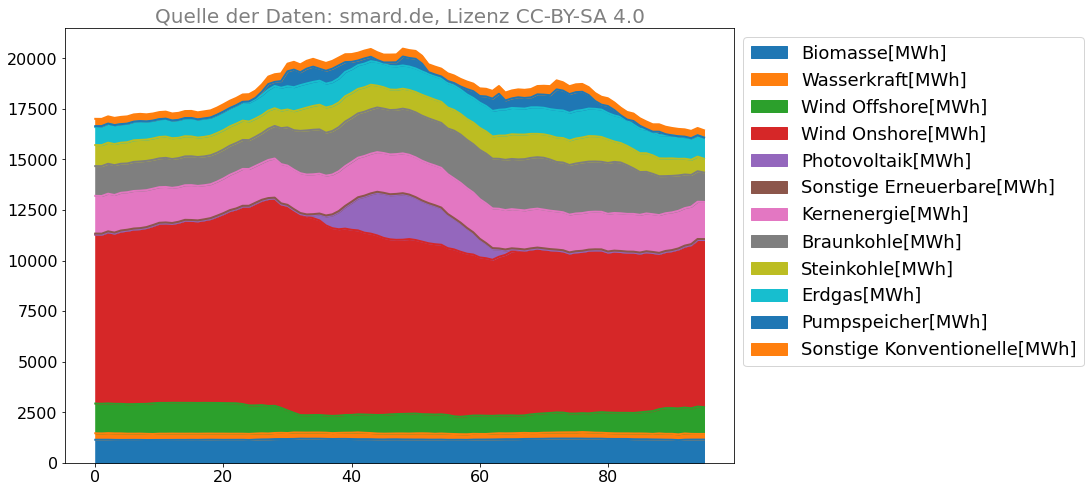

In [91]:
smardWinter = pd.read_csv('https://raw.githubusercontent.com/morlokle/Abgabe/main/SMARDWinter.csv', sep=',')
smardWinter['Datum'] = pd.to_datetime(smardWinter['Datum'], format='%d.%m.%Y %H:%M')
#smard['Uhrzeit'] = pd.to_datetime(smard['Uhrzeit'], format='')
#timdel = strommix_bsp['Datum'][0]-strommix_bsp['Uhrzeit'][0]
#strommix_bsp['Zeit'] = timdel+strommix_bsp['Uhrzeit']
#strommix_bsp = strommix_bsp.set_index('Zeit')
co2 = smardWinter
co2 = co2.drop(['Biomasse[MWh]', 'Wasserkraft[MWh]', 'Wind Offshore[MWh]', 'Wind Onshore[MWh]','Photovoltaik[MWh]'
                ,'Sonstige Erneuerbare[MWh]','Kernenergie[MWh]',
                   'Braunkohle[MWh]','Steinkohle[MWh]','Erdgas[MWh]','Pumpspeicher[MWh]',
                  'Sonstige Konventionelle[MWh]'],axis=1)
smardWinter = smardWinter.apply(pd.to_numeric)#, errors='coerce', downcast='float')

smardWinter = smardWinter.drop(['Datum'],axis=1)

#smard.plot(subplots=True)
#smard.plot(x = 'Datum')
smardWinter.plot.area(figsize=(12,8))
plt.title('Quelle der Daten: smard.de, Lizenz CC-BY-SA 4.0', color='gray')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [92]:
co2['Biomasse [kg CO2]'] = smardWinter['Biomasse[MWh]']*co2factor.loc[0,'Biomasse[kgCO2/MWh]']
co2['Wasserkraft [kg CO2]'] = smardWinter['Wasserkraft[MWh]']*co2factor.loc[0,'Wasserkraft[kgCO2/MWh]']
co2['Wind Offshore [kg CO2]'] = smardWinter['Wind Offshore[MWh]']*co2factor.loc[0,'Wind Offshore[kgCO2/MWh]']
co2['Wind Onshore [kg CO2]'] = smardWinter['Wind Onshore[MWh]']*co2factor.loc[0,'Wind Onshore[kgCO2/MWh]']
co2['Photovoltaik [kg CO2]'] = smardWinter['Photovoltaik[MWh]']*co2factor.loc[0,'Photovoltaik[kgCO2/MWh]']
co2['Sonstige Erneuerbare [kg CO2]'] = smardWinter['Sonstige Erneuerbare[MWh]']*co2factor.loc[0,'Sonstige Erneuerbare[kgCO2/MWh]']
co2['Kernenergie [kg CO2]'] = smardWinter['Kernenergie[MWh]']*co2factor.loc[0,'Kernenergie[kgCO2/MWh]']
co2['Braunkohle [kg CO2]'] = smardWinter['Braunkohle[MWh]']*co2factor.loc[0,'Braunkohle[kgCO2/MWh]']
co2['Steinkohle [kg CO2]'] = smardWinter['Steinkohle[MWh]']*co2factor.loc[0,'Steinkohle[kgCO2/MWh]']
co2['Erdgas [kg CO2]'] = smardWinter['Erdgas[MWh]']*co2factor.loc[0,'Erdgas[kgCO2/MWh]']
co2['Pumpspeicher [kg CO2]'] = smardWinter['Pumpspeicher[MWh]']*co2factor.loc[0,'Pumpspeicher[kgCO2/MWh]']
co2['Sonstige Konventionelle [kg CO2]'] = smardWinter['Sonstige Konventionelle[MWh]']*co2factor.loc[0,'Sonstige Konventionelle[kgCO2/MWh]']
print (co2)

                 Datum  Biomasse [kg CO2]  Wasserkraft [kg CO2]  \
0  2021-01-21 00:00:00             309808                   966   
1  2021-01-21 00:15:00             310080                   939   
2  2021-01-21 00:30:00             310080                   981   
3  2021-01-21 00:45:00             308176                   969   
4  2021-01-21 01:00:00             307360                   975   
..                 ...                ...                   ...   
91 2021-01-21 22:45:00             305456                   852   
92 2021-01-21 23:00:00             310624                   927   
93 2021-01-21 23:15:00             311984                   849   
94 2021-01-21 23:30:00             312256                   837   
95 2021-01-21 23:45:00             312256                   837   

    Wind Offshore [kg CO2]  Wind Onshore [kg CO2]  Photovoltaik [kg CO2]  \
0                     8808                  91916                      0   
1                     8802                 

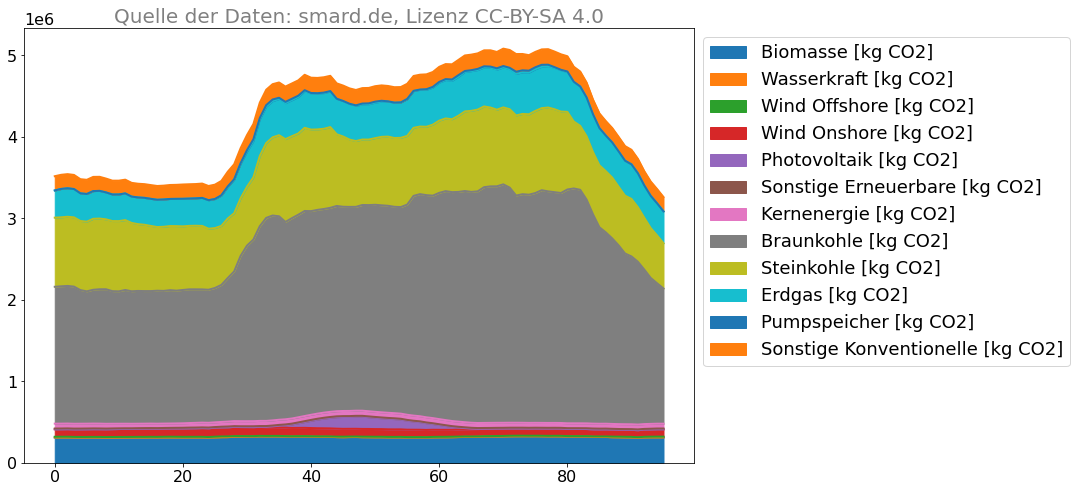

In [93]:
co2 = co2.apply(pd.to_numeric)#, errors='coerce', downcast='float')

co2 = co2.drop(['Datum'],axis=1)

#co2.plot(subplots=True)
#co2.plot(x = 'Datum')
co2.plot.area(figsize=(12,8))
plt.title('Quelle der Daten: smard.de, Lizenz CC-BY-SA 4.0', color='gray')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [94]:
# Hier werden die SMARD Daten eingelesen
smard = 'https://raw.githubusercontent.com/morlokle/Abgabe/main/SMARD.csv'
smard = pd.read_csv(smard,delimiter = ',', decimal= '.')
# Hier wird eine csv-Datei mit Emissionsfaktoren eingelesen
co2factor = 'https://raw.githubusercontent.com/morlokle/Abgabe/main/CO2Energieerzeugung.csv'
co2factor = pd.read_csv(co2factor,delimiter = ',')
co2factor.loc[0,'Biomasse[kgCO2/MWh]']

272

In [95]:
# da Datum als object erkannt wird Konvertierung zu datetime
smard['Datum'] = smard.Datum.apply(#
    lambda x: #
    dt.datetime.strptime(x, "%d.%m.%Y %H:%M"))

In [96]:
smard.head()

,Datum,Biomasse[MWh],Wasserkraft[MWh],Wind Offshore[MWh],Wind Onshore[MWh],Photovoltaik[MWh],Sonstige Erneuerbare[MWh],Kernenergie[MWh],Braunkohle[MWh],Steinkohle[MWh],Erdgas[MWh],Pumpspeicher[MWh],Sonstige Konventionelle[MWh]
0,2021-01-01 00:00:00,1152,308,85,1050,0,57,2034,2899,937,1402,73,411
1,2021-01-01 00:15:00,1149,301,88,1019,0,57,2036,2905,872,1416,95,411
2,2021-01-01 00:30:00,1148,299,101,947,0,57,2037,2904,829,1419,82,409
3,2021-01-01 00:45:00,1148,298,109,918,0,57,2038,2901,805,1412,98,407
4,2021-01-01 01:00:00,1146,310,106,923,0,57,2038,2911,785,1363,156,410


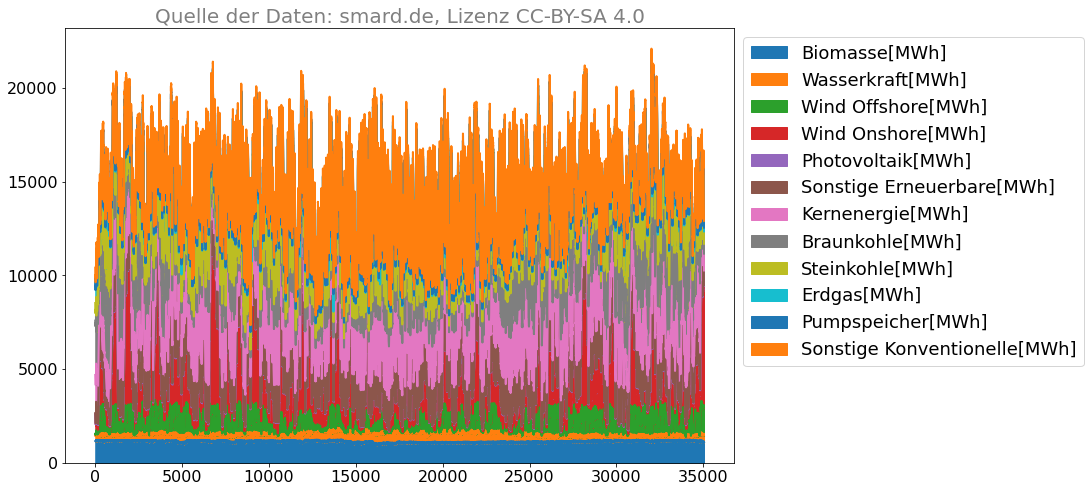

In [97]:
smard = pd.read_csv('https://raw.githubusercontent.com/morlokle/Abgabe/main/SMARD.csv', sep=',')
smard['Datum'] = pd.to_datetime(smard['Datum'], format='%d.%m.%Y %H:%M')
#smard['Uhrzeit'] = pd.to_datetime(smard['Uhrzeit'], format='')
#timdel = strommix_bsp['Datum'][0]-strommix_bsp['Uhrzeit'][0]
#strommix_bsp['Zeit'] = timdel+strommix_bsp['Uhrzeit']
#strommix_bsp = strommix_bsp.set_index('Zeit')
co2 = smard
co2 = co2.drop(['Biomasse[MWh]', 'Wasserkraft[MWh]', 'Wind Offshore[MWh]', 'Wind Onshore[MWh]','Photovoltaik[MWh]'
                ,'Sonstige Erneuerbare[MWh]','Kernenergie[MWh]',
                   'Braunkohle[MWh]','Steinkohle[MWh]','Erdgas[MWh]','Pumpspeicher[MWh]',
                  'Sonstige Konventionelle[MWh]'],axis=1)
smard = smard.apply(pd.to_numeric)#, errors='coerce', downcast='float')

smard = smard.drop(['Datum'],axis=1)

#smard.plot(subplots=True)
#smard.plot(x = 'Datum')
smard.plot.area(figsize=(12,8))
plt.title('Quelle der Daten: smard.de, Lizenz CC-BY-SA 4.0', color='gray')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [98]:
co2['Biomasse [kg CO2]'] = smard['Biomasse[MWh]']*co2factor.loc[0,'Biomasse[kgCO2/MWh]']
co2['Wasserkraft [kg CO2]'] = smard['Wasserkraft[MWh]']*co2factor.loc[0,'Wasserkraft[kgCO2/MWh]']
co2['Wind Offshore [kg CO2]'] = smard['Wind Offshore[MWh]']*co2factor.loc[0,'Wind Offshore[kgCO2/MWh]']
co2['Wind Onshore [kg CO2]'] = smard['Wind Onshore[MWh]']*co2factor.loc[0,'Wind Onshore[kgCO2/MWh]']
co2['Photovoltaik [kg CO2]'] = smard['Photovoltaik[MWh]']*co2factor.loc[0,'Photovoltaik[kgCO2/MWh]']
co2['Sonstige Erneuerbare [kg CO2]'] = smard['Sonstige Erneuerbare[MWh]']*co2factor.loc[0,'Sonstige Erneuerbare[kgCO2/MWh]']
co2['Kernenergie [kg CO2]'] = smard['Kernenergie[MWh]']*co2factor.loc[0,'Kernenergie[kgCO2/MWh]']
co2['Braunkohle [kg CO2]'] = smard['Braunkohle[MWh]']*co2factor.loc[0,'Braunkohle[kgCO2/MWh]']
co2['Steinkohle [kg CO2]'] = smard['Steinkohle[MWh]']*co2factor.loc[0,'Steinkohle[kgCO2/MWh]']
co2['Erdgas [kg CO2]'] = smard['Erdgas[MWh]']*co2factor.loc[0,'Erdgas[kgCO2/MWh]']
co2['Pumpspeicher [kg CO2]'] = smard['Pumpspeicher[MWh]']*co2factor.loc[0,'Pumpspeicher[kgCO2/MWh]']
co2['Sonstige Konventionelle [kg CO2]'] = smard['Sonstige Konventionelle[MWh]']*co2factor.loc[0,'Sonstige Konventionelle[kgCO2/MWh]']
print (co2)

                    Datum  Biomasse [kg CO2]  Wasserkraft [kg CO2]  \
0     2021-01-01 00:00:00             313344                   924   
1     2021-01-01 00:15:00             312528                   903   
2     2021-01-01 00:30:00             312256                   897   
3     2021-01-01 00:45:00             312256                   894   
4     2021-01-01 01:00:00             311712                   930   
...                   ...                ...                   ...   
35035 2021-12-31 22:45:00             298656                  1098   
35036 2021-12-31 23:00:00             297024                  1095   
35037 2021-12-31 23:15:00             296480                  1098   
35038 2021-12-31 23:30:00             297024                  1107   
35039 2021-12-31 23:45:00             296752                  1089   

       Wind Offshore [kg CO2]  Wind Onshore [kg CO2]  Photovoltaik [kg CO2]  \
0                         510                  11550                      0   
1

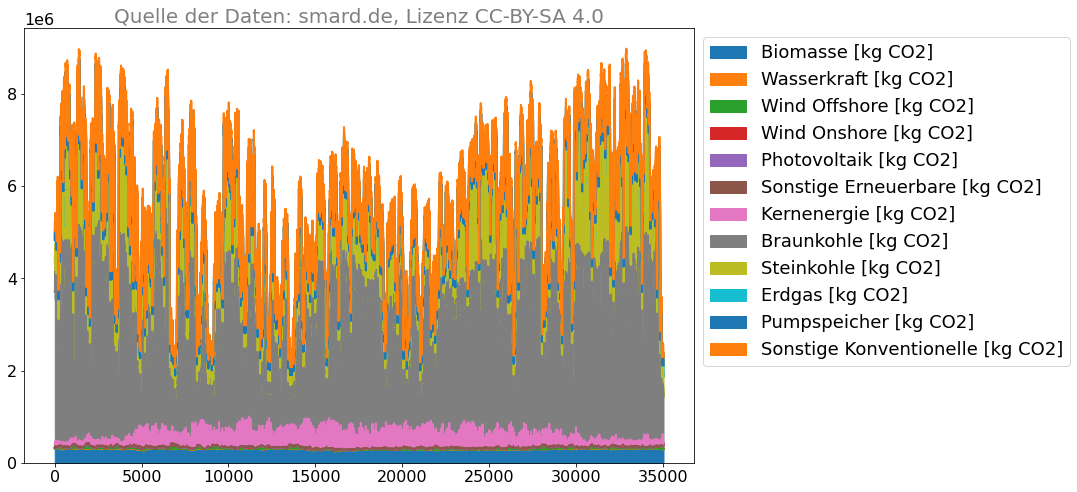

In [99]:
co2 = co2.apply(pd.to_numeric)#, errors='coerce', downcast='float')

co2 = co2.drop(['Datum'],axis=1)

#co2.plot(subplots=True)
#co2.plot(x = 'Datum')
co2.plot.area(figsize=(12,8))
plt.title('Quelle der Daten: smard.de, Lizenz CC-BY-SA 4.0', color='gray')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# Messungen durchführen und zu Jahreslastprofilen ergänzen

Art: Kabelstaubsauger Siemens <br> Typ: VS06A111 <br> Name des Geräts: synchropower <br> Inhalt des Typenschilds oder des Datenblatts: Spannung = 220-240V, Frequenz = 50/60Hz, Leistung = 600W

In [100]:
# Hier wird die erste Messung gezeigt (Messung über ca. 25 min, Saugfläche:  
# Der Prüfling sollte sich gezielt keine Gedanken machen über die Effizienz des Systems beim Saugvorgang!
messung1 = 'https://raw.githubusercontent.com/morlokle/Abgabe/main/Daten_Siemens_Dauerlinie.csv'
messung1 = pd.read_csv(messung1,delimiter = ',', decimal= '.')

In [101]:
# da Datum als object erkannt wird Konvertierung zu datetime
messung1['Aufnahmezeit'] = messung1.Aufnahmezeit.apply(#
    lambda x: #
    dt.datetime.strptime(x, "%d.%m.%Y %H:%M"))

In [102]:
print(messung1)

          Aufnahmezeit  Stromstärke (A)  Wirkleistung (W)  Scheinleistung (W)
0  2022-10-27 14:04:00            0.000          0.000000              0.0000
1  2022-10-27 14:05:00            0.983         61.707825            228.5475
2  2022-10-27 14:06:00            2.911        654.526706            674.7698
3  2022-10-27 14:07:00            2.884        648.735612            668.7996
4  2022-10-27 14:08:00            2.867        645.189680            665.1440
5  2022-10-27 14:09:00            2.855        643.043070            662.9310
6  2022-10-27 14:10:00            2.841        639.889794            659.6802
7  2022-10-27 14:11:00            2.623        529.198119            608.2737
8  2022-10-27 14:12:00            2.843        639.237178            659.0074
9  2022-10-27 14:13:00            2.830        636.314180            655.9940
10 2022-10-27 14:14:00            2.808        631.639944            651.1752
11 2022-10-27 14:15:00            2.838        638.388234       

**Beobachtungen und Auffälligkeiten:** <br> 
- Da der Energielogger nur minütliche Werte ausgibt, muss ein besonderes Augenmerk auf die erste und die letzte Minute der Messung gelegt werden und diese ggf. vernachlässigt werden. Außerdem ist aufallend, dass die Leistung des Staubsaugers mehr oder weniger in den Minuten 2-19 konstant zwischen 655-630 W schwankt und darin nur ein einzelner Ausreiser mit ca. 523 W liegt. Eine Abweichung ist jedoch zwischen der 19-23 Minute zu erkennen in welchen der Messende den Teppich und das Sofa in dem Raum gemessen hat und deswegen die Stufe am Staubsauger wechseln musste.

In [103]:
# Hier wird die zweite Messung gezeigt (Messung über ca. 20 min, Saugfläche:  
# Prüfling hat hier gezielt durchgehend auf der zweiten Stufe des Staubsaugers gesaugt!
messung2 = 'https://raw.githubusercontent.com/morlokle/Abgabe/main/18.11.22_20MinutenStufe2%20(1).csv'
messung2 = pd.read_csv(messung2,delimiter = ';', decimal= ',')

In [104]:
# da Datum als object erkannt wird Konvertierung zu datetime
messung2['Aufnahmezeit'] = messung2.Aufnahmezeit.apply(#
    lambda x: #
    dt.datetime.strptime(x,"%m.%d.%Y %H:%M"))

In [105]:
print(messung2)

          Aufnahmezeit  Stromstärke (A)  Wirkleistung (W)  Scheinleistung (W)
0  2022-11-18 18:20:00            0.880         32.848640            205.3040
1  2022-11-18 18:21:00            2.661        427.441752            619.4808
2  2022-11-18 18:22:00            2.599        417.123906            604.5274
3  2022-11-18 18:23:00            2.573        413.306136            598.9944
4  2022-11-18 18:24:00            2.567        412.342344            597.5976
5  2022-11-18 18:25:00            2.557        411.088890            595.7810
6  2022-11-18 18:26:00            2.556        410.928120            595.5480
7  2022-11-18 18:27:00            2.529        406.412829            589.0041
8  2022-11-18 18:28:00            2.549        410.154492            594.4268
9  2022-11-18 18:29:00            2.562        412.423074            597.7146
10 2022-11-18 18:30:00            2.558        411.426162            596.2698
11 2022-11-18 18:31:00            2.564        411.506616       

**Beobachtungen und Auffälligkeiten:** <br>
- Auch hier gibt des Energielogger wieder nur minütliche Werte aus. Deswegen kann die die erste und die letzte Minute der Messung vernachlässigt werden. Das Gesamtssystem schwankt zwischen einem Maximum von 427 W und einem Minimum von 402 Watt. Es ist aufällig, dass das Maximum mit der ersten Messung erreicht wird und anschließend das Leistungsniveau abnimmt. Evtl. muss der Staubsauger erst auf eine gewisse Betriebstemperatur kommen und benötigt so mehr Leistung zu Beginn der Messung.

In [106]:
# Funktionen definieren
def map_timestamp(df, start_timestamp_string, resolution = 1, column_name = "timestamp"):
    
    # Create datetime object from start timestamp
    start_timestamp = dt.datetime.strptime(start_timestamp_string, "%Y-%m-%d %H:%M:%S")
    
    timestamps = []
    
    # Iterate through data frame rows
    for idx, row in df.iterrows():
        
        # Create mapped timestamp
        mapped_timestamp = start_timestamp + dt.timedelta(minutes = len(timestamps) * resolution)
        
        # Append timestamp
        timestamps.append(mapped_timestamp)
        
    
    df[column_name] = timestamps
    
    
    # Return mapped data frame
    return df

def create_uniform_dataframe(size, value):
    values = []
    
    for i in range(0, size):
        values.append(value)
    
    timestamps = ["2019-01-01 00:00:00" for x in range(size)]

    df = pd.DataFrame()
    
    df["timestamp"] = timestamps
    df["Stromstärke (A)"] = values
    df["Wirkleistung (W)"] = values
    df["Scheinleistung (W)"] = values

    # Store datetime object in timestamp
    df["timestamp"] = df["timestamp"].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

    return df

def concat_data(dfs):
    
    # dfs in tuple-format: (dataFrame, startTimestamp)
    
    # Prepare data frames
    dfsToConcat = []
    
    # Set timestamps
    for df in dfs:
        mapped_df = map_timestamp(df[0], df[1])
        dfsToConcat.append(mapped_df.copy())
        
    return pd.concat(dfsToConcat)

def timestamp_based_concat(df, start_timestamp_string, number_of_concats, offset):
    result = []
    
    # Create datetime object from start timestamp
    start_timestamp = dt.datetime.strptime(start_timestamp_string, "%Y-%m-%d %H:%M:%S")

    for i in range(0, number_of_concats):
        
        timestamp = start_timestamp + dt.timedelta(minutes = offset * i)
        timestamp_string = timestamp.strftime("%Y-%m-%d %H:%M:%S")
        
        result.append((df.copy(), timestamp_string))
        
    return result

In [107]:
#Kein Standbyverbrauch da wir Kabelgeundenen Staubsauger haben
examplestandby = 0.0 # Watt
examplestandbydf = create_uniform_dataframe(1,examplestandby)

In [108]:
no_days = 356 # number of days
start_date = dt.datetime.strptime("2022-01-01 00:00:00", "%Y-%m-%d %H:%M:%S")
duration = 24*60*(no_days-1) # minutes in a day during no_days
exampledata = timestamp_based_concat(examplestandbydf, start_date.strftime("%Y-%m-%d %H:%M:%S"), duration, 1)
for x in range(no_days-1): 
    tmp_date = start_date + dt.timedelta(days = x, hours = 9+np.random.randn(1)[0])
    tmp_date2 = start_date + dt.timedelta(days = x, hours = 11.5+np.random.randn(1)[0])
    exampledata.extend(timestamp_based_concat(messung2, tmp_date.strftime("%Y-%m-%d %H:%M:%S"), 1, 1))
    exampledata.extend(timestamp_based_concat(messung2, tmp_date2.strftime("%Y-%m-%d %H:%M:%S"), 1, 1))
exampledatadf = concat_data(exampledata)
exampledatadf = exampledatadf.set_index('timestamp')
exampledatadf.plot(subplots=True, figsize=(,20))
plt.show()

SyntaxError: invalid syntax (2728827213.py, line 12)

In [ ]:
no_days = 356 # number of days
start_date = dt.datetime.strptime("2022-01-01 00:00:00", "%Y-%m-%d %H:%M:%S")
duration = 24*60*(no_days-1) # minutes in a day during no_days
exampledata = timestamp_based_concat(examplestandbydf, start_date.strftime("%Y-%m-%d %H:%M:%S"), duration, 1)
for x in range(no_days-1): 
    tmp_date = start_date + dt.timedelta(days = x, hours = 9+np.random.randn(1)[0])
    tmp_date2 = start_date + dt.timedelta(days = x, hours = 11.5+np.random.randn(1)[0])
    exampledata.extend(timestamp_based_concat(messung1, tmp_date.strftime("%Y-%m-%d %H:%M:%S"), 1, 1))
    exampledata.extend(timestamp_based_concat(messung1, tmp_date2.strftime("%Y-%m-%d %H:%M:%S"), 1, 1))
exampledatadf = concat_data(exampledata)
exampledatadf = exampledatadf.set_index('timestamp')
exampledatadf.plot(subplots=True, figsize=(12,8))
plt.show()

In [ ]:
import numpy as np
# inload charging profile 
charging_data = 'https://raw.githubusercontent.com/mmuelheim/SYE/main/Ladezyklus_messung.csv'
charging_df = pd.read_csv(charging_data, delimiter=";", decimal=',')
charging_df = charging_df.dropna()
charging_df = charging_df.drop(columns=['Stromstärke (A)', 'Scheinleistung (W)'])
charging_df.head()
charging_df['Nutzungsart'] = ['charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging','charging',]
## Create Randomised load profile
# Get Measurement data to create yearly load profile
whole_meas = pd.read_csv(originalMeasurement, delimiter=';', decimal=',')
whole_meas = whole_meas.dropna()
whole_meas = whole_meas.drop(columns=['Stromstärke (A)', 'Scheinleistung (W)', 'Bildschirmhelligkeit', 'Volume','Bluetooth','Microfon','Kamera ','Weitere Anwenundungen geöffnet'])
# create a dataframe for each use profile
df_netflix = whole_meas.loc[whole_meas['Nutzungsart'] == 'Netflix']
df_standby = whole_meas.loc[whole_meas['Nutzungsart'] == 'Standby Desktop']
df_spotify = whole_meas.loc[whole_meas['Nutzungsart'] == 'Spotify']
df_teams = whole_meas.loc[whole_meas['Nutzungsart'] == 'Teams Meeting']
df_teams_ss = whole_meas.loc[whole_meas['Nutzungsart'] == 'Teams Meeting&Screen Sharing']
# Get energy demand of use profiles
netflix_energy = df_netflix['Wirkleistung (W)'].mean()*(len(df_netflix)/60)
standby_energy = df_standby['Wirkleistung (W)'].mean()*(len(df_standby)/60)
spotify_energy = df_spotify['Wirkleistung (W)'].mean()*(len(df_spotify)/60)
teams_energy = df_teams['Wirkleistung (W)'].mean()*(len(df_teams)/60)
teams_ss_energy = df_teams_ss['Wirkleistung (W)'].mean()*(len(df_teams_ss)/60)
#print(f'Netflix: {netflix_energy} Wh\nStandby: {standby_energy} Wh\nSpotify: {spotify_energy} Wh\nTeams: {teams_energy} Wh\nTeams&Screen: {teams_ss_energy} Wh')
# create a list of all the dfs to later pick them randomly
random_list = [df_netflix, df_standby, df_spotify, df_teams, df_teams_ss]
energy__allocation = [netflix_energy,standby_energy,spotify_energy,teams_energy,teams_ss_energy] # create list to later order energy to used dataframe
# create Standy dataframe --> Ersetzen mit der Standby Messung
thinkpad_standby = 0.54 # Watt -> from Laptop data paper
standby_df = create_uniform_dataframe(1,thinkpad_standby) # create a dataframe only with the standby power
# Number of days to create -> 365 for one year
no_days = 2 # number of days
start_date =dt.datetime.strptime("01-01-2020 00:00:00", "%d-%m-%Y %H:%M:%S") #start Datum festlegen
duration = 24*60*(no_days-1) # minutes in a day during no_days      
exampledata = timestamp_based_concat(standby_df, start_date.strftime("%d-%m-%Y %H:%M:%S"), duration, 1) # Create the standby df for amount of days 
max_length = (22-16)*60 # The maximal minutes the newly created use df for each day should have to fit our assumpted use case of the laptop -> (von ca. 16 Uhr - ca. 22 Uhr an Werktagen)
i = 1 # implement counter to implement different using times during weekends
charging_cycle_counter = 0
 #Save the randomly generated numbers for later use to make the efficiency measure compareable
weekend_picker_list = [] #Save the randomly generated numbers for later use to make the efficiency measure compareable
use_picker_dict = {}
for x in range(no_days-1):
    use_picker_list = []
    timer_list = []
    akku_empty_energy = []
    energy_consumption = 0
    #### randomiser
    if i == 6 or i == 7: # Days on weekends
      picker2 = random.randint(1,2) # create a random picker to choose if the laptop is used on weekend days or not
      weekend_picker_list.append(picker2)
      if picker2 == 1: ## an random Wochenendtagen auch mal keine Nutzung
        df_random = pd.DataFrame()
        timer = 0 
        max_length = (22-12)*60
        while timer < max_length:
          picker = random.randint(0,4)
          use_picker_list.append(picker)
          df = random_list[picker]
          energy_consumption = energy_consumption + energy__allocation[picker] #Für Wochenenden wird bei jedem Anfügen der einzelnen Nutzungen auch die verbrauchte Energie gespeichert
          timer =timer + len(df)
          if energy_consumption >= 45:
            df_random = df_random.append(df, ignore_index=True)
            akku_empty_energy.append(energy_consumption)
            timer_list.append(timer)
        #measurement = df_random.drop(columns=['Nutzungsart'])
        measurement = df_random
        measurement = measurement.append(charging_df)
        charging_cycle_counter = charging_cycle_counter + 1
        measurement = measurement.rename(columns={'Aufnahmezeit':'timestamp','Wirkleistung (W)':'Active Power [W]'})
        print(f'Akku an Tag{x} ist leer mit {np.min(akku_empty_energy)} Wh nach etwa {np.min(timer_list)} Minuten')
        delta = dt.timedelta(hours=np.min(timer_list)/60)
        # Die Zeit wo die Load anfängt ist, wenn der Akku leer ist und das Gerät eingesteckt wird -> Die Zeit ist, wenn die Energy consumption das erste Mal über 45 Wh ist
        tmp_date1 = start_date + dt.timedelta(days = x, hours = 16 ) ## Nutzung fängt irgendwann zwischen 15 und 17 uhr an
        tmp_date = tmp_date1 + delta
      else:
        measurement = standby_df
        tmp_date = start_date + dt.timedelta(days = x, hours = 12) 
      exampledata.extend(timestamp_based_concat(measurement, tmp_date.strftime("%d-%m-%Y %H:%M:%S"), 1, 1))
      if i == 7: # One sunday reset counter for another week
        i = 0
      i = i + 1
    else: # working days 
      df_random = pd.DataFrame()
      df_load = pd.DataFrame() ## Create a df for the one year load profile
      timer = 0
      max_length = (22-16)*60
      while timer < max_length:
        picker = random.randint(0,4)
        use_picker_list.append(picker)
        df = random_list[picker]
        energy_consumption = energy_consumption + energy__allocation[picker] #Für Wochenenden wird bei jedem Anfügen der einzelnen Nutzungen auch die verbrauchte Energie gespeichert
        timer =timer + len(df)
        if energy_consumption >= 42: #### die Zeit für temp Date muss fest gesetzt werden auf die Zeit wenn das erste mal 45 Wh überschritten wird
          akku_empty_energy.append(energy_consumption)
          timer_list.append(timer)
          df_random = df_random.append(df, ignore_index=True)      
      #measurement = df_random.drop(columns=['Nutzungsart'])
      measurement = df_random
      measurement = measurement.append(charging_df)
      charging_cycle_counter = charging_cycle_counter + 1
      measurement = measurement.rename(columns={'Aufnahmezeit':'timestamp','Wirkleistung (W)':'Active Power [W]'})
      print(f'Akku an Tag{x} ist leer mit {np.min(akku_empty_energy)} Wh nach etwa {np.min(timer_list)} Minuten')
      delta = dt.timedelta(hours=np.min(timer_list)/60)
      # Die Zeit wo die Load anfängt ist, wenn der Akku leer ist und das Gerät eingesteckt wird -> Die Zeit ist, wenn die Energy consumption das erste Mal über 45 Wh ist
      tmp_date1 = start_date + dt.timedelta(days = x, hours = 16 ) ## Nutzung fängt irgendwann zwischen 15 und 17 uhr an
      tmp_date = tmp_date1 + delta
      exampledata.extend(timestamp_based_concat(measurement, tmp_date.strftime("%d-%m-%Y %H:%M:%S"), 1, 1))
      i = i + 1
    use_picker_dict[x] = use_picker_list
yearly_load_profile = concat_data(exampledata)
yearly_load_profile = yearly_load_profile.sort_values('Active Power [W]', ascending=False).drop_duplicates('timestamp').sort_index()
yearly_load_profile = yearly_load_profile.sort_values(by='timestamp')
yearly_load_profile = yearly_load_profile.set_index('timestamp')
fig = go.Figure()
fig.add_trace(go.Scatter(mode='lines', x=yearly_load_profile.index, y= yearly_load_profile['Active Power [W]']))
fig.show()
print(f'Bei dem Lastprofil über {no_days} Tage wurde der Akku {charging_cycle_counter} mal aufgeladen')
## Akku mit 45 Wh
#bei jeder addierung der Datensätze die verbrauchten Wh aufaddieren solange bis > 45
energy_mean = (yearly_load_profile['Active Power [W]'].sum()/60/1000)
print(energy_mean)

In [ ]:
messung1['Jahresprofil1'] = 

# Maßnahmen zur Verbesserung der Klimawirkungen und des Energieverbrauchs evaluieren

**Einsparmaßnamen im Überblick**
1. Dauerhaftes Staubsaugen auf Stufe 2 (2x pro Woche für 20 Minuten)
2. Nutzung des erneuerbaren PV-Stroms der eigenen PV-Anlage; Staubsaugen zu bestimmter Uhrzeit (1x pro Woche um 12 Uhr)
3. Einbau einer Anzeige über Füllstand des Staubsaugerbeutels: Geregelter Austausch bei Füllstand von 80% 
4. Austausch des Messgerätes durch einen neuen, effizienteren Staubsauger

## Maßnahme 1: Staubsaugen auf Stufe 2 

## Maßnahme 2: Staubsaugen zu bestimmter Uhrzeit (12 Uhr Mittags)

## Maßnahme 3: Einbau einer Anzeige über Füllstand des Staubsaugerbeutels

Benötigte Stromkosten 0,45ct/kWh mit Stromeinsatz aus Messung2 pro Saugvorgang (Staubsaugen über 20min auf Stufe2)

0,45ct/kWh * 0,2598 kWh (benötigte Energie pro Saugvorgang)

wir rechnen somit mit zwei Varianten: V1: 0,1168920 €/Saugvorgang (ohne Anzeige) V2: 0,09351366 €/Saugvorgang (mit Anzeige)

## Maßnahme 4: Austausch des Messgerätes durch einen neuen, effizienteren Staubsauger

### Wirtschaftlichkeit der Einsparmethode bewerten

- Die gewählte Einsparmethode ist den Fokus auf den vermehrten Austausch des Staubsaugerbeutels zu legen, sodass der Staubsauger so weniger Luft-Widerstände hat und somit weniger Leistung für die identische Saugleistung benötigt.

- Dafür soll in den Staubsauger ein analoger Controller eingebaut werden, welcher mit einer Anzeige ausgestattet ist und darstellt, wie voll der Staubsaugerbeutel ist. 
- Die Anzeige soll erst von grün auf rot wechseln, wenn 80% des Staubbeutels voll sind. 
Anschließend soll der Beutel getauscht werden.

- Es wird angenommen, dass durch diese Einsparung 20% weniger Leistung und somit weniger Energie zum saugen benötigt wird. 
> Zur Vereinfachung sind in dieser Rechnung 20% weniger Leistung = 20% weniger Stromkosten die benötigt weden)

- Zum Vergleich wird einmal mit Cotroller zur Filterwechselanzeige gerechnet und einmal ohne, um die Investition bewerten zu können

#### Kapitalgebundene Kosten
- **kapitalgebundene Kosten**: Analoger Controller für 40 Euro 

*Fiktives Beispiel*
> Zum Glück kennt sich der Cousin von Simon Kammerer mit Staubsaugercontrollern aus und erklärt sich bereit seinen Sonntag für den Umbau zu opfern. Ihm machen Bastelarbeiten Spaß und deswegen fallen Personalkosten die für den komplizierten Umbau von 3 Stunden nötig sind auf 5€ pro Stunde an. 
 
> Parallel bekommt ein Nachbar auch Lust seinen Staubsauger umzurüsten. Allerdings hat nun sein Coisin nach dem Umbau von 3 Stunden nicht mehr so viel Lust auf den Umbau und seine Personalkosten steigen auf 30€ pro Stunde.

In [109]:
invest = -40 # Euro
hourly_wage = np.array([5.0, 30.0]) # Euro Stundenlohn
installation = -0.5*hourly_wage # Euro
capital_cost = invest + installation
print('kapitalgebundene Kosten: '+str(capital_cost[0])+' EUR bis '+str(capital_cost[1])+ ' EUR')

kapitalgebundene Kosten: -42.5 EUR bis -55.0 EUR


Benötigte Stromkosten 0,45ct/kWh mit Stromeinsatz aus Messung2 pro Saugvorgang (Staubsaugen über 20min auf Stufe2) <br> <br> 0,45ct/kWh * 0,2598 kWh (benötigte Energie pro Saugvorgang)
- wir rechnen somit mit zwei Varianten: V1: 0,1168920 €/Saugvorgang (ohne Anzeige) V2: 0,09351366 €/Saugvorgang (mit Anzeige)

**Nutzungsdauer des Controllers = Nutzungsdauer des Staubsauger**

In [110]:
TN = 5 # Jahre 

- **bedarfsgebundene Kosten - hier Erlöse**: 
- aus Lastprofilen ergibt sich eine potenzielle Einsparung von 52 kWh im Jahr, Strompreis 45 ct/kWh, Saughäufigkeit = 52*2 # 2x pro Woche

In [111]:
energysavings = 52 # kWh
electricityprice = 0.45 # Euro
usage_cost = energysavings*electricityprice
print('bedarfsgebundene Erlöse im ersten Jahr: '+str(usage_cost)+' EUR/a')

bedarfsgebundene Erlöse im ersten Jahr: 23.400000000000002 EUR/a


- **betriebsgebundene Kosten**: 
  - Anzeigen-Wartung - entfällt, sehr robustes Einbauteil welches nicht überarbeitet werden muss
  - Betrieb - entfällt, da die Anzeige analog ist
  - Sicherheit - keine relevantes Sicherheitsrisiko durch Anzeige

In [112]:
maintenance_cost = 0
print('betriebsgebundene Kosten :'+str(maintenance_cost)+' EUR')

betriebsgebundene Kosten :0 EUR


- sonstige Kosten: Versicherung und allgemeine Verwaltungskosten entfallen

In [113]:
other_cost = 0
print('sonstige Kosten :'+str(other_cost)+' EUR')

sonstige Kosten :0 EUR


Betrachtungszeitraum  𝑇  2022/2023:

15 Jahre

In [114]:
T = 15 # a

In [115]:
p = 0.05 # Zinsfuß von 5 %
q = 1+p
print('Zinsfaktor im Projekt: '+str(q))

Zinsfaktor im Projekt: 1.05


In [116]:
r = 1 # Analoge Staubsaugeranzeigen bleiben im Preis konstant
print('Preisänderungsfaktor Anzeige: '+str(r))

Preisänderungsfaktor Anzeige: 1


In [117]:
# Berechnung Annuitätsfaktor
#a = (q**T)*(q-1)/((q**T)-1)
#print('Der Annuitätsfaktor beträgt '+str(a))

In [118]:
################ nochmal checken
# Berechung
n = T // TN
A = []
for i in range(n):
    A[i] = capital_cost*(r**(i*TN))/(q**(i*TN))
print('Die Barwerte für Ersatzbeschaffungen sind '+str(A)+' Euro')

IndexError: list assignment index out of range

In [119]:
################ nochmal checken
# Berechung Restwert
RW = capital_cost*(r**(n*TN))*(((n+1)*TN-T)/TN)*(1/(q**T))
print('Der Restwert beträgt '+str(RW))

Der Restwert beträgt [-20.44322667 -26.4559404 ]


In [120]:
############# nochmal checken
ANK = (sum(A) +capital_cost - RW)*a
print('Die Annuität der kapitalgebundenen Kosten beträgt' ,ANK)

NameError: name 'a' is not defined

**Annuität der bedarfsgebundenen Kosten berechnen**

In [121]:
rv = 1.01 # jährliche Strompreiserhöhung
bv = (1-((rv/q)**T))/(q-rv)
print('Der preisdynamische Barwertfaktor für bedarfsgebundene Kosten beträgt '+str(bv))

Der preisdynamische Barwertfaktor für bedarfsgebundene Kosten beträgt 11.038852052855463


In [122]:
ANV = usage_cost*a*bv
print('Für diese Maßnahme ist die Annuität der bedarfsgebundenen Kosten '+str(np.round(ANV,2))+' Euro/a')

NameError: name 'a' is not defined

**Annuität der betriebsgebundenen Kosten berechnen**

In [123]:
rb = 1.0 # Lohnsteigerung (nicht vorhanden)
bb = (1-((rb/q)**T))/(q-rb)
print('preisdynamischer Barwertfaktor der betriebsbedingten Kosten: '+str(bb))

preisdynamischer Barwertfaktor der betriebsbedingten Kosten: 10.379658038180592


In [124]:
################ nochmal checken
bi = bb # selbe Person (zuhause, alles selber), gleiche Änderung
operation_cost = 0
ANB = -2.0 # operation_cost*a*bb + maintenance_cost*a*bi
print('Annuität der betriebsgebundenen Kosten zwischen '+str(np.round(ANB[0],2))+' Euro/a und '+str(np.round(ANB[1],2))+' Euro/a')

TypeError: 'float' object is not subscriptable

**Annuität der sonstigen Kosten und Erlöse berechnen**

In [ ]:
bs = 1 # keine Relevanz
ANS = other_cost * a * bs
print('Annuität der sonstigen Kosten: '+str(np.round(ANS,2))+' Euro/a')

In [125]:
data = {'kapitalgebunden': ANK,
       'bedarfsgebunden': [ANV,ANV], # zweimal drin wg. Variante
       'betriebsgebunden': ANB,
       'sonstige': [ANS,ANS]} # zweimal drin wg. Variante
index = [str(int(hourly_wage[0])),str(int(hourly_wage[1]))]
ann = pd.DataFrame(data=data,index=index)
ax = ann.plot.barh(stacked=True, ylabel='Stundenlohn [EUR]', figsize=(9,6))
ax.invert_yaxis()
ax.legend(loc='upper left')
ann_low_wage = ANK[0]+ANV+ANB[0]+ANS
ann_high_wage = ANK[1]+ANV+ANB[1]+ANS
ax.text(ann_low_wage,0,str(np.round(ann_low_wage,2))+' EUR/a', fontsize='15')
ax.text(ann_high_wage,1,str(np.round(ann_high_wage,2))+' EUR/a', fontsize='15')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

NameError: name 'ANK' is not defined

Fazit: Durch die Wirtschaftlichkeitsberechnung. 
    
Ob Energie effizienter eingesetzt wird, kann erst durch den genauen Materialverbrauch und Energieeinsatz ermittelt werden, 
der für die Herstellung eines Staubsaugerbeutels "Typ Siemens synchropower" nötig ist. Da durch den vermehrten Austausch der 
Staubbeutel, wird zwar mit weniger Staub störungsfreier gesaugt und somit weniger Leistung für den Saugvorgang benötigt, 
jedoch kann es dazu kommen das mehr von diesen Beuteln verbraucht werden und die Herstellung dieser besonders Energieaufwänig ist 
und somit doch nicht weniger Energie eingesetzt wurde. (vgl. reverse Effekt)

Da die Datenlage für den Energie- und Materialeinsatz eines Staubbeutels in der Produktion eher undurchsichtig ist, 
muss bei weiterer Behandlung dieser Thematik...... Für den Rahmen einer Wirtschaftlichkeitsbetrachtung der Effizienzmaßnahme einer Anzeige für den Füllstand des Staubbeutels ist jedoch zu......